In [1]:
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('processed_data.csv')
df.set_index(['Ticker', 'Date'], inplace=True)

In [3]:
test = df.loc[833][35:]
test.insert(0, 'Change_Indicator', np.where(test['ROCP_Close'] >= 0, 1, 0))
dimensions = len(test.columns)

In [4]:
def load_data(df, sequence_length=10, split=0.8):
    data_all = np.array(df).astype(float)
    scaler = MinMaxScaler()  # What is this?
    data_all = scaler.fit_transform(data_all)
    data = []
    for i in range(len(data_all) - sequence_length - 1):
        data.append(data_all[i: i + sequence_length + 1])
    reshaped_data = np.array(data).astype('float64')
    # Do we want to be shuffling the data? Isn't this going to lose out on the sequentiality of it?
    np.random.shuffle(reshaped_data)
    
    x = reshaped_data[:, :-1]
    y = reshaped_data[:, -1]
    split_boundary = int(reshaped_data.shape[0] * split)
    train_x = x[: split_boundary]
    test_x = x[split_boundary:]

    train_y = y[: split_boundary,0]
    test_y = y[split_boundary:,0]
    return train_x, train_y, test_x, test_y, scaler

In [5]:
def build_model():
    # input_dim是输入的train_x的最后一个维度，train_x的维度为(n_samples, time_steps, input_dim)
    # https://keras.io/getting-started/sequential-model-guide/
    model = Sequential()
    model.add(LSTM(43, input_dim=dimensions, return_sequences=True))
    model.add(LSTM(86, return_sequences=False))
    model.add(Dense(43))
    model.add(Dense(2, activation='softmax'))
    model.add(Activation('linear'))


    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [6]:
def train_model(train_x, train_y, test_x, test_y):
    model = build_model()

    try:
        labels = to_categorical(train_y, num_classes=2)
        model.fit(train_x, labels, batch_size=512, nb_epoch=300, validation_split=0.1)
        predict = model.predict(test_x)
        predict = np.reshape(predict, (predict.size, ))
    except KeyboardInterrupt:
        print(predict)
        print(test_y)
        
    print(predict)
    print(test_y)
    
    try:
        indicator = list()
        count = 0
        for i in range(1, len(predict), 2):
            count += 1
            indicator.append(1 if predict[i] >= predict[i - 1] else 0)
        
        fig = plt.figure(1)
        plt.plot(indicator, 'r*')
        plt.plot(test_y, 'g.')
        plt.legend(['predict', 'true'])
    except Exception as e:
        print(e)
    return predict, test_y

In [7]:
model = build_model()
print(model.summary())

C:\Users\Tzvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
C:\Users\Tzvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(43, return_sequences=True, input_shape=(None, 43))`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 43)          14964     
_________________________________________________________________
lstm_2 (LSTM)                (None, 86)                44720     
_________________________________________________________________
dense_1 (Dense)              (None, 43)                3741      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 88        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 63,513
Trainable params: 63,513
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Tzvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
C:\Users\Tzvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(43, return_sequences=True, input_shape=(None, 43))`
  """
C:\Users\Tzvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 838 samples, validate on 94 samples
Epoch 1/300
838/838 [==============================] - 2s 2ms/step - loss: 0.2513 - val_loss: 0.2520
Epoch 2/300
838/838 [==============================] - 0s 239us/step - loss: 0.2482 - val_loss: 0.2433
Epoch 3/300
838/838 [==============================] - 0s 239us/step - loss: 0.2455 - val_loss: 0.2454
Epoch 4/300
838/838 [==============================] - 0s 239us/step - loss: 0.2454 - val_loss: 0.2447
Epoch 5/300
838/838 [==============================] - 0s 239us/step - loss: 0.2449 - val_loss: 0.2442
Epoch 6/300
838/838 [==============================] - 0s 258us/step - loss: 0.2445 - val_loss: 0.2429
Epoch 7/300
838/838 [==============================] - 0s 221us/step - loss: 0.2449 - val_loss: 0.2411
Epoch 8/300
838/838 [==============================] - 0s 239us/step - loss: 0.2534 - val_loss: 0.2410
Epoch 9/300
838/838 [==============================] - 0s 239us/step - loss: 0.2456 - val_loss: 0.2416
Epoch 10/300
838/838 [========

838/838 [==============================] - 0s 246us/step - loss: 0.2372 - val_loss: 0.2449
Epoch 80/300
838/838 [==============================] - 0s 250us/step - loss: 0.2393 - val_loss: 0.2468
Epoch 81/300
838/838 [==============================] - 0s 339us/step - loss: 0.2398 - val_loss: 0.2469
Epoch 82/300
838/838 [==============================] - 0s 248us/step - loss: 0.2369 - val_loss: 0.2444
Epoch 83/300
838/838 [==============================] - 0s 249us/step - loss: 0.2358 - val_loss: 0.2433
Epoch 84/300
838/838 [==============================] - 0s 272us/step - loss: 0.2367 - val_loss: 0.2451
Epoch 85/300
838/838 [==============================] - 0s 281us/step - loss: 0.2370 - val_loss: 0.2388
Epoch 86/300
838/838 [==============================] - 0s 254us/step - loss: 0.2380 - val_loss: 0.2434
Epoch 87/300
838/838 [==============================] - 0s 279us/step - loss: 0.2376 - val_loss: 0.2410
Epoch 88/300
838/838 [==============================] - 0s 252us/step - loss:

838/838 [==============================] - 0s 260us/step - loss: 0.2221 - val_loss: 0.2466
Epoch 158/300
838/838 [==============================] - 0s 254us/step - loss: 0.2249 - val_loss: 0.2609
Epoch 159/300
838/838 [==============================] - 0s 254us/step - loss: 0.2246 - val_loss: 0.2436
Epoch 160/300
838/838 [==============================] - 0s 267us/step - loss: 0.2198 - val_loss: 0.2532
Epoch 161/300
838/838 [==============================] - 0s 254us/step - loss: 0.2200 - val_loss: 0.2647
Epoch 162/300
838/838 [==============================] - 0s 236us/step - loss: 0.2268 - val_loss: 0.2679
Epoch 163/300
838/838 [==============================] - 0s 264us/step - loss: 0.2231 - val_loss: 0.2560
Epoch 164/300
838/838 [==============================] - 0s 254us/step - loss: 0.2189 - val_loss: 0.2462
Epoch 165/300
838/838 [==============================] - 0s 235us/step - loss: 0.2159 - val_loss: 0.2690
Epoch 166/300
838/838 [==============================] - 0s 258us/ste

838/838 [==============================] - 0s 243us/step - loss: 0.2035 - val_loss: 0.2748
Epoch 236/300
838/838 [==============================] - 0s 237us/step - loss: 0.1946 - val_loss: 0.2657
Epoch 237/300
838/838 [==============================] - 0s 240us/step - loss: 0.1939 - val_loss: 0.2795
Epoch 238/300
838/838 [==============================] - 0s 246us/step - loss: 0.1972 - val_loss: 0.2803
Epoch 239/300
838/838 [==============================] - 0s 243us/step - loss: 0.2001 - val_loss: 0.2554
Epoch 240/300
838/838 [==============================] - 0s 233us/step - loss: 0.2072 - val_loss: 0.2816
Epoch 241/300
838/838 [==============================] - 0s 235us/step - loss: 0.2024 - val_loss: 0.2577
Epoch 242/300
838/838 [==============================] - 0s 229us/step - loss: 0.1932 - val_loss: 0.2492
Epoch 243/300
838/838 [==============================] - 0s 230us/step - loss: 0.1946 - val_loss: 0.2769
Epoch 244/300
838/838 [==============================] - 0s 240us/ste

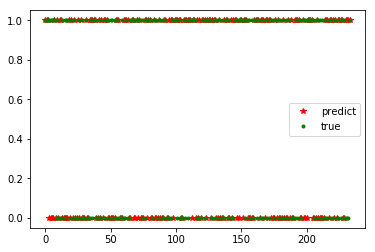

In [8]:
train_x, train_y, test_x, test_y, scaler = load_data(test)
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], dimensions))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], dimensions))
predict_y, test_y = train_model(train_x, train_y, test_x, test_y)

In [9]:
indicator = list()
count = 0
for i in range(1, len(predict_y), 2):
    count += 1
    indicator.append(1 if predict_y[i] >= predict_y[i - 1] else 0)

In [10]:
correct = 0
plotter = list()
for i in range(len(indicator)):
    if indicator[i] == test_y[i]:
        correct += 1
        plotter.append(1)
    else:
        plotter.append(0)

print("Correct: " + str(correct))
print("% Right: " + str(correct/len(indicator)))

Correct: 122
% Right: 0.5213675213675214
